In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import glob
from functools import reduce
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
all_samples = glob.glob("../small_RNA_seq_15_C/results/*/counts/alignment.sorted.filtered/counts.tsv")

In [3]:
all_samples

['../small_RNA_seq_15_C/results/wild_type_I/counts/alignment.sorted.filtered/counts.tsv',
 '../small_RNA_seq_15_C/results/alg_4_alg_3_C/counts/alignment.sorted.filtered/counts.tsv',
 '../small_RNA_seq_15_C/results/wild_type_F/counts/alignment.sorted.filtered/counts.tsv',
 '../small_RNA_seq_15_C/results/alg_4_alg_3_B/counts/alignment.sorted.filtered/counts.tsv',
 '../small_RNA_seq_15_C/results/mut_2_C/counts/alignment.sorted.filtered/counts.tsv',
 '../small_RNA_seq_15_C/results/Dpf_3_null_B/counts/alignment.sorted.filtered/counts.tsv',
 '../small_RNA_seq_15_C/results/mut_7_B/counts/alignment.sorted.filtered/counts.tsv',
 '../small_RNA_seq_15_C/results/Dpf_3_S784A_A/counts/alignment.sorted.filtered/counts.tsv',
 '../small_RNA_seq_15_C/results/wild_type_B/counts/alignment.sorted.filtered/counts.tsv',
 '../small_RNA_seq_15_C/results/mut_7_A/counts/alignment.sorted.filtered/counts.tsv',
 '../small_RNA_seq_15_C/results/wild_type_H/counts/alignment.sorted.filtered/counts.tsv',
 '../small_RNA_

In [4]:
dfs = []
for sample_path in all_samples:
    sample_name = sample_path.split("/")[3]
    df = pd.read_csv(sample_path, header=0, sep="\t")
    df.set_index("Name", inplace=True)
    df.columns = df.columns + "_" + sample_name
    dfs.append(df)

In [5]:
df_all = reduce(lambda left,right: pd.merge(left, right , on='Name', how="outer"), dfs)

In [6]:
df_all.columns = list(df_all.columns.str.replace("counts_", ""))

In [7]:
samples_to_use = ['Dpf_3_S784A_A',
 'Dpf_3_S784A_B',
 'Dpf_3_S784A_C',
 'Dpf_3_null_A',
 'Dpf_3_null_B',
 'Dpf_3_null_C',
 'mut_2_A',
 'mut_2_B',
 'mut_2_C',
 'mut_7_A',
 'mut_7_B',
 'mut_7_C']

In [8]:
df_all = df_all[samples_to_use]

In [9]:
df_all.fillna(0, inplace=True)

In [10]:
df = df_all[df_all.sum(axis=1)>max(20, len(df_all.columns))].copy()

In [11]:
df = (df/df.sum(axis=0)) * (df.sum(axis=0).mean())
df = df + 8
df = np.log2(df)

In [12]:
df_22G = df[(df.index.str.len() == 22) & (df.index.str.startswith("G"))].copy()

In [13]:
df_22G.shape

(7486, 12)

In [14]:
df_22G.head()

,Dpf_3_S784A_A,Dpf_3_S784A_B,Dpf_3_S784A_C,Dpf_3_null_A,Dpf_3_null_B,Dpf_3_null_C,mut_2_A,mut_2_B,mut_2_C,mut_7_A,mut_7_B,mut_7_C
Name,,,,,,,,,,,,
GTGAGTGGACGAGAAAAAGGCG,3.316671,3.770343,3.481032,4.236972,3.739565,3.000000,3.000000,4.122597,3.511572,3.354213,3.849144,3.149563
GTGGCGTGTACTGCAGAAAACC,3.000000,3.000000,3.481032,3.605907,3.342406,3.260232,3.755598,3.224285,3.888465,3.000000,3.000000,3.285067
GCGTGGCGTGTACTGCAGAAAA,4.155274,3.190470,3.337800,3.143246,3.618932,3.480619,3.298006,3.000000,3.000000,3.000000,3.000000,3.000000
GAAGACGGACGTTGCTATTCTG,3.576190,3.000000,3.000000,3.701614,3.618932,3.758601,3.000000,3.000000,3.511572,3.000000,3.000000,3.000000
GTCTTGTGGAAGTTCTTCTTGC,3.452258,3.000000,3.730809,3.791364,3.487284,3.260232,3.298006,3.000000,3.000000,3.000000,3.000000,3.000000


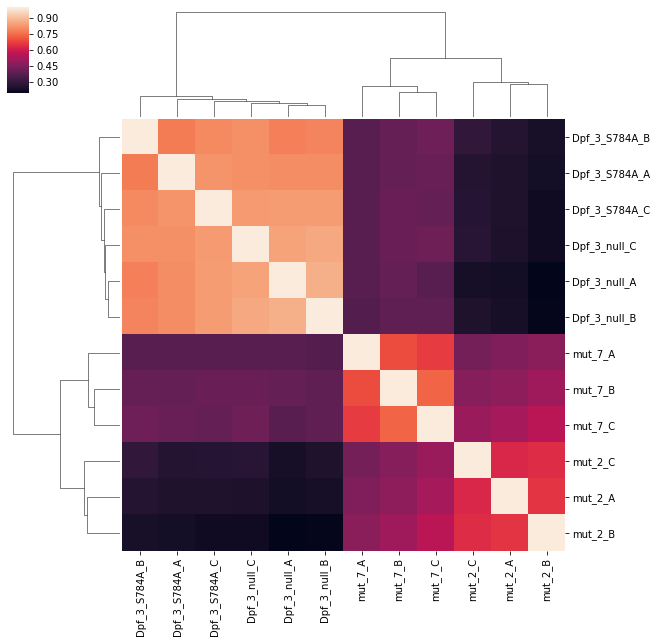

In [15]:
plt.rcParams["figure.figsize"] = (20,20)
# g = sns.heatmap(df_all.corr(method="pearson"))
g = sns.clustermap(df_22G.corr(method="pearson"))
# plt.title("Clustering")
# plt.savefig("plots/heatmap_pearson.pdf")

In [16]:
df_22G["log2(mean(Dpf_3_null))"]  = df_22G[["Dpf_3_null_A", "Dpf_3_null_B", "Dpf_3_null_C"]].mean(axis=1)

In [17]:
df_22G["log2(mean(Dpf_3_S784A))"]  = df_22G[["Dpf_3_S784A_A", "Dpf_3_S784A_B", "Dpf_3_S784A_C"]].mean(axis=1)

In [18]:
df_22G["log2(mean(mut_7))"]  = df_22G[["mut_7_A", "mut_7_B", "mut_7_C"]].mean(axis=1)

In [19]:
df_22G["log2(mean(mut_2))"]  = df_22G[["mut_2_A", "mut_2_B", "mut_2_C"]].mean(axis=1)

In [20]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-14, 10)
alpha=1
marker='o'
s=10
legend=False
linewidth=0

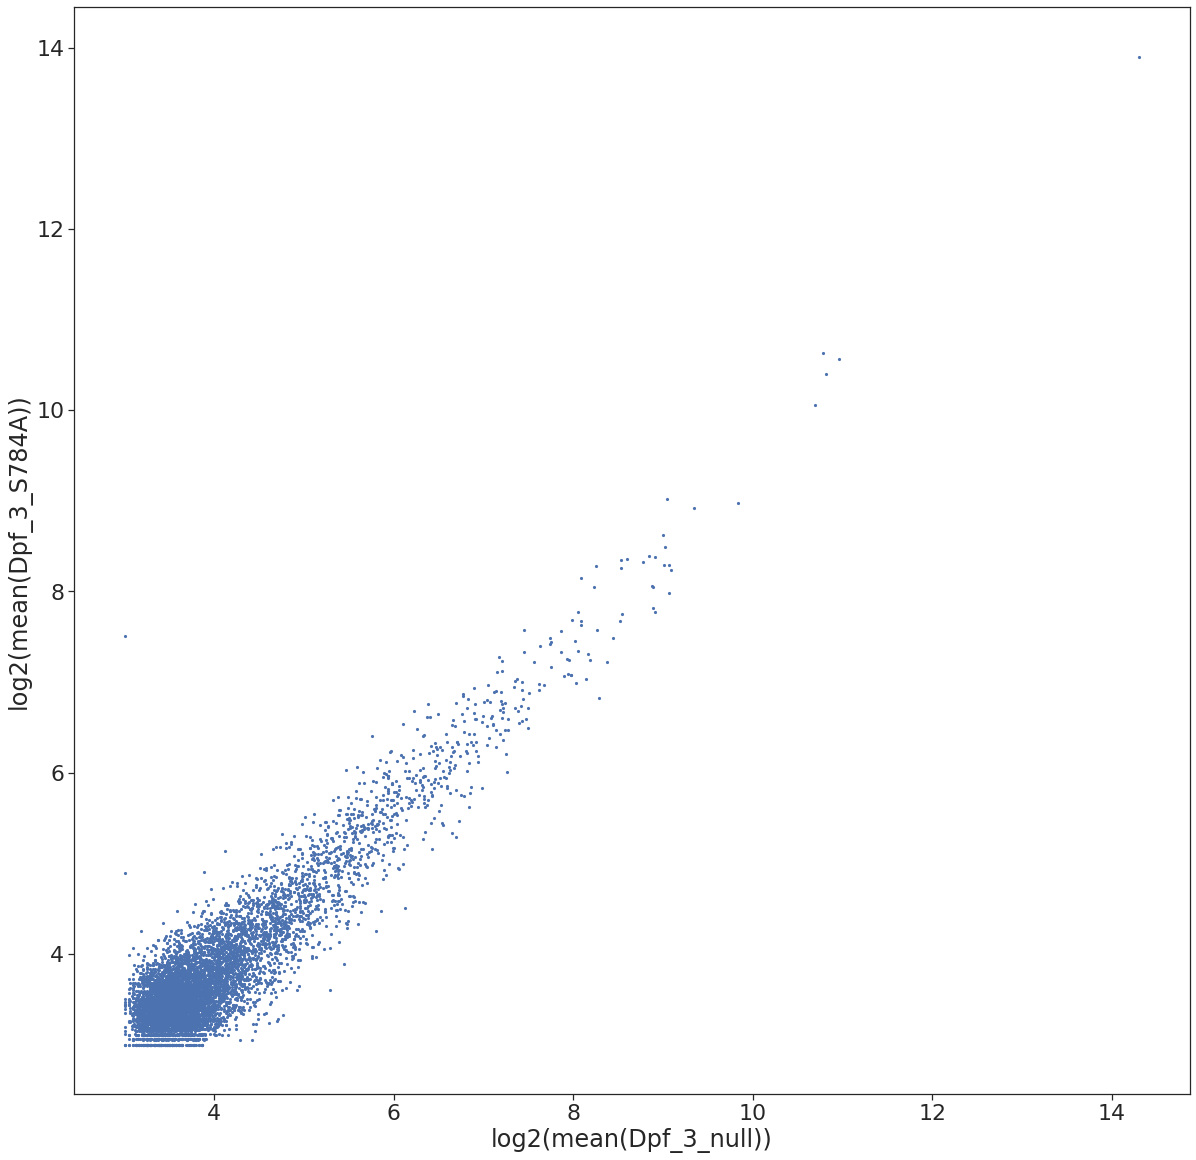

In [21]:
sns_plot = sns.scatterplot(x="log2(mean(Dpf_3_null))",
                           y="log2(mean(Dpf_3_S784A))",
                           data=df_22G,
                           s=s,
#                            hue="Significant",
#                            hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
#                            palette=["black", "blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

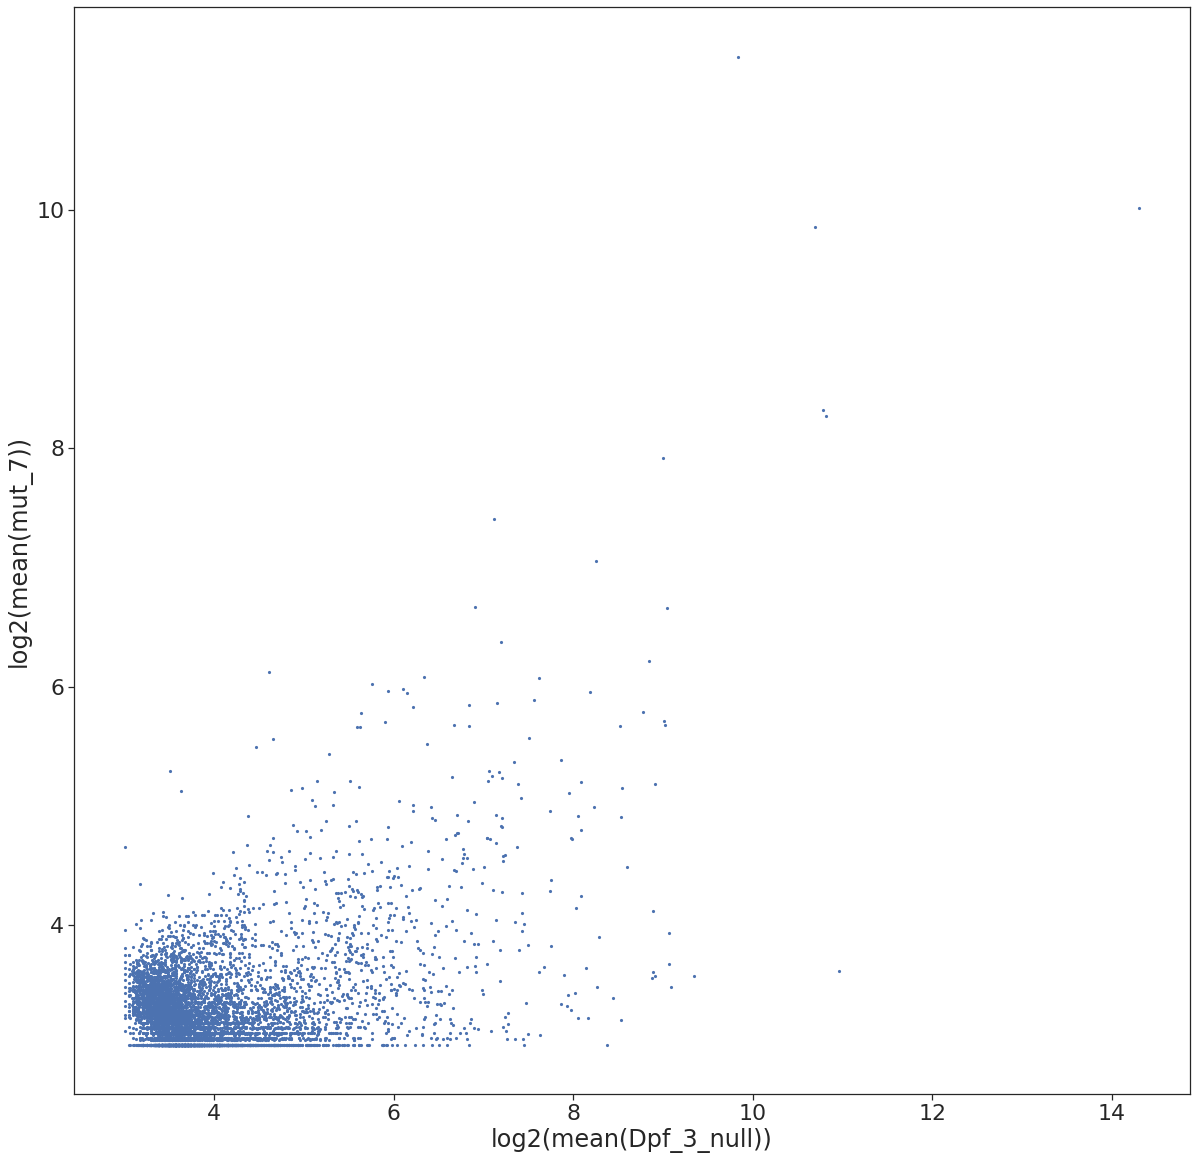

In [22]:
sns_plot = sns.scatterplot(x="log2(mean(Dpf_3_null))",
                           y="log2(mean(mut_7))",
                           data=df_22G,
                           s=s,
#                            hue="Significant",
#                            hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
#                            palette=["black", "blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

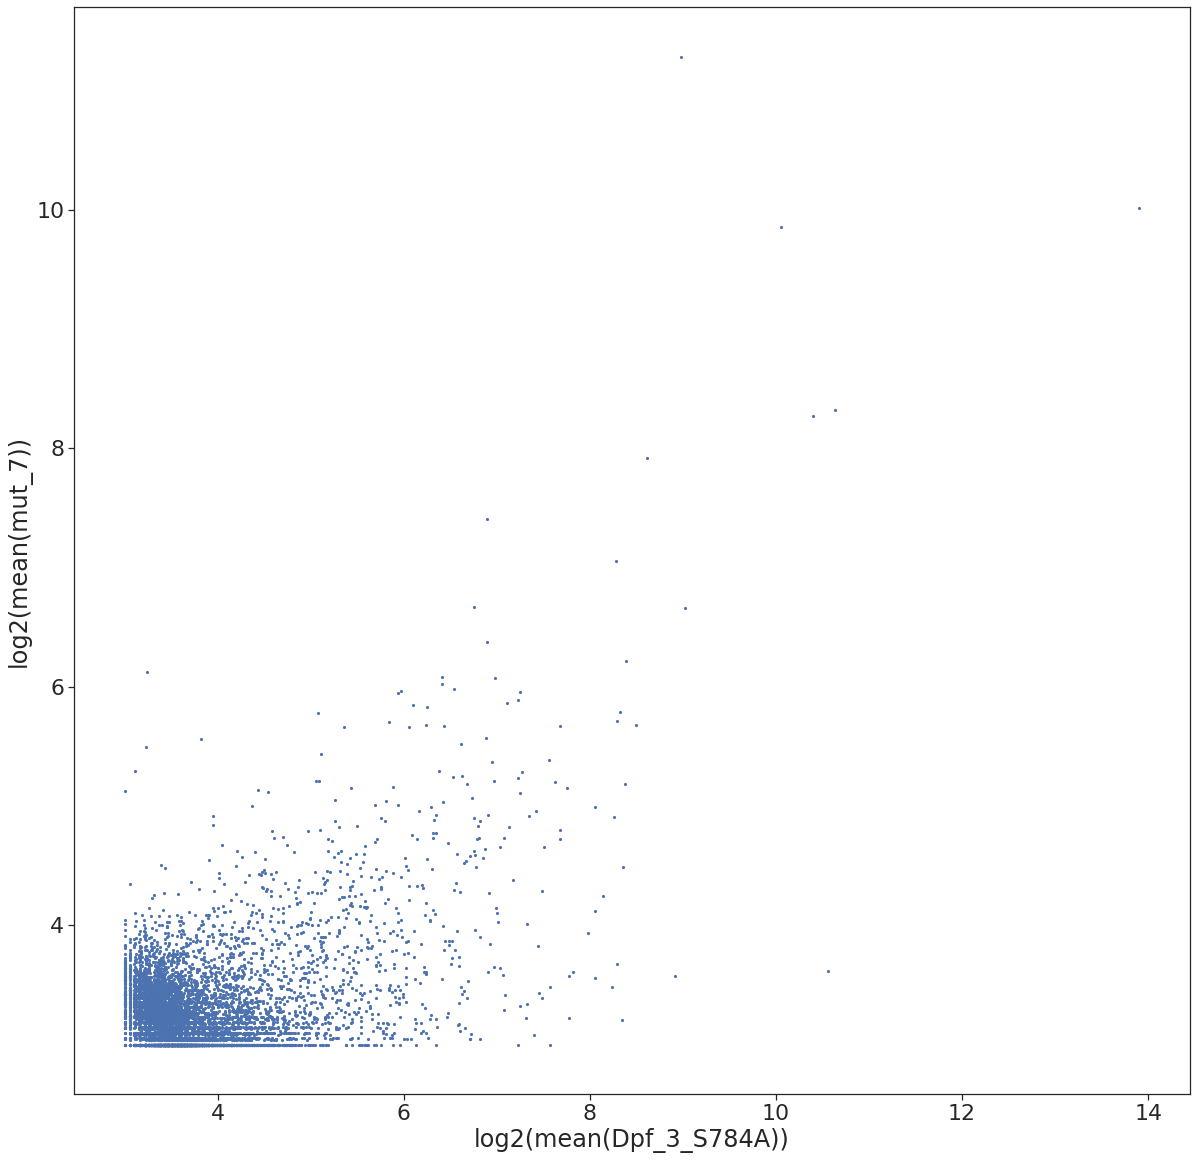

In [23]:
sns_plot = sns.scatterplot(x="log2(mean(Dpf_3_S784A))",
                           y="log2(mean(mut_7))",
                           data=df_22G,
                           s=s,
#                            hue="Significant",
#                            hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
#                            palette=["black", "blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

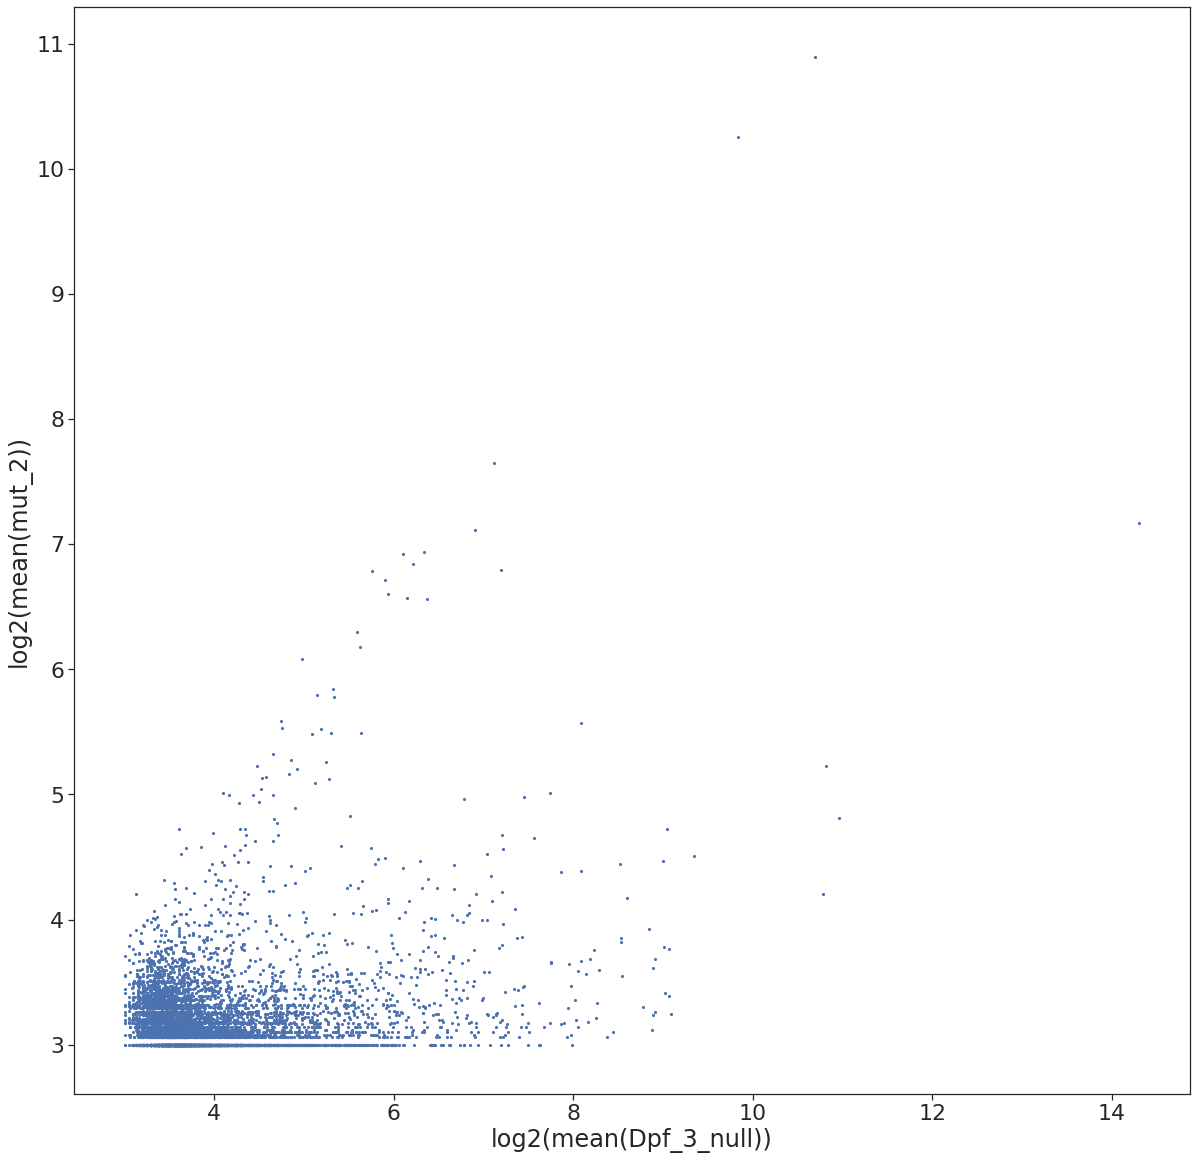

In [24]:
sns_plot = sns.scatterplot(x="log2(mean(Dpf_3_null))",
                           y="log2(mean(mut_2))",
                           data=df_22G,
                           s=s,
#                            hue="Significant",
#                            hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
#                            palette=["black", "blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

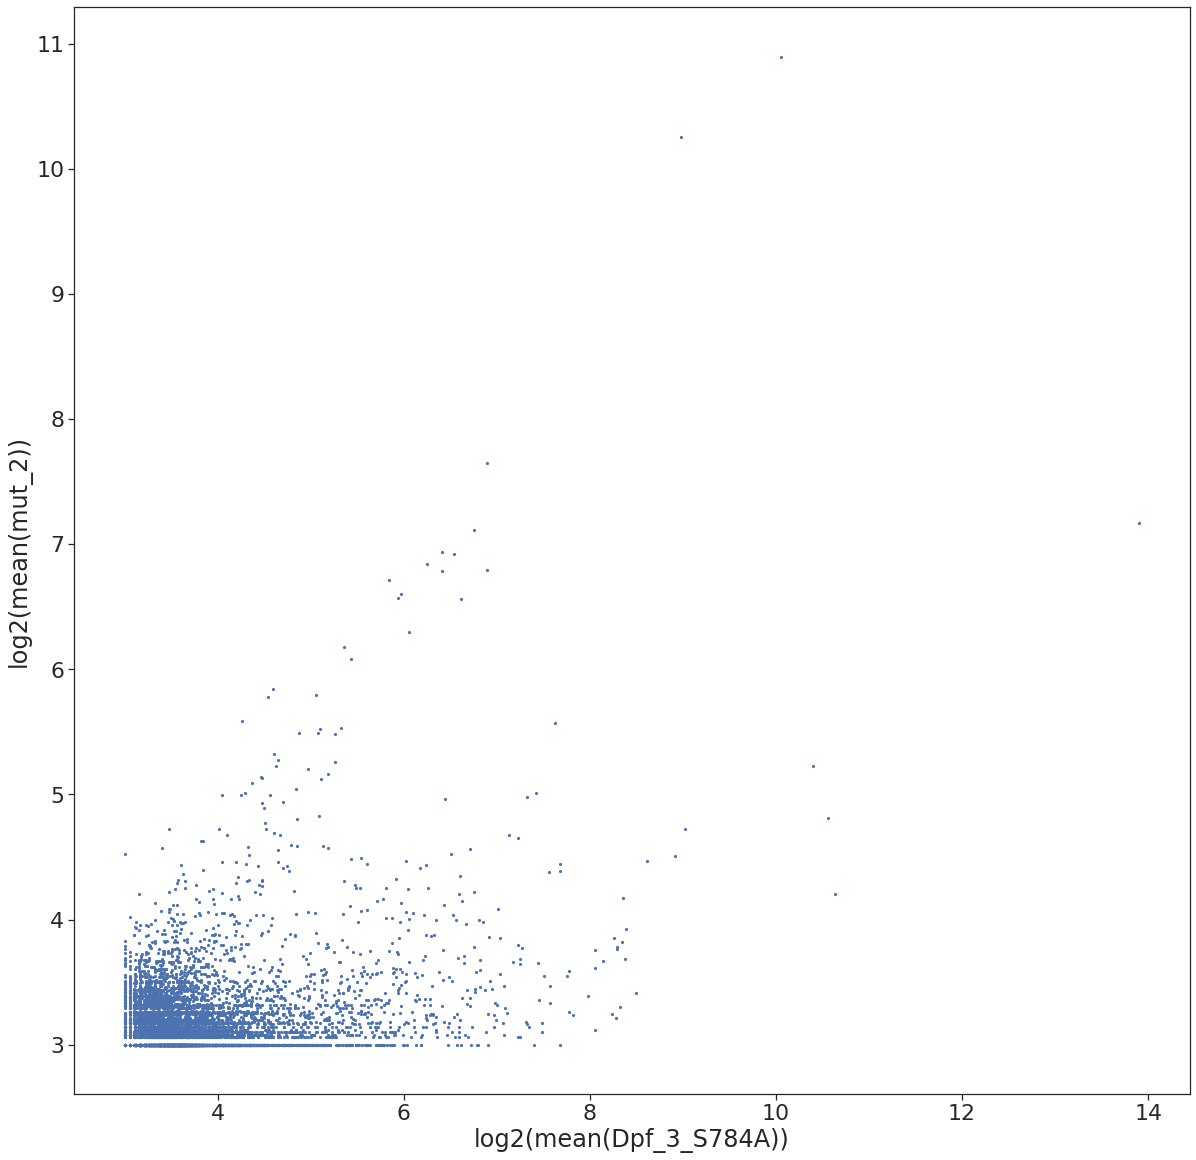

In [25]:
sns_plot = sns.scatterplot(x="log2(mean(Dpf_3_S784A))",
                           y="log2(mean(mut_2))",
                           data=df_22G,
                           s=s,
#                            hue="Significant",
#                            hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
#                            palette=["black", "blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

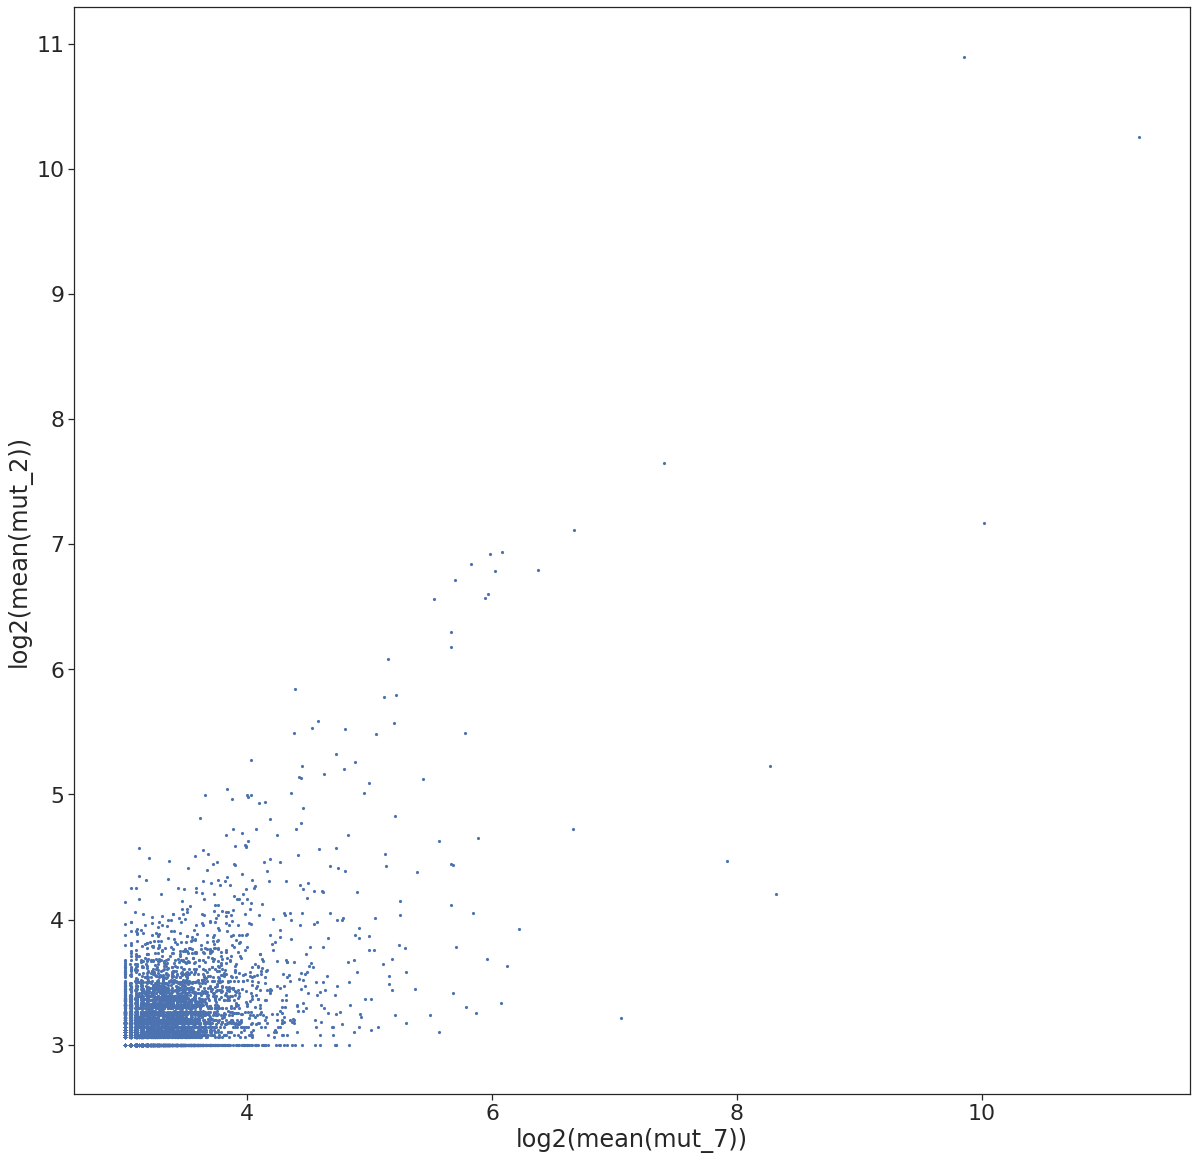

In [26]:
sns_plot = sns.scatterplot(x="log2(mean(mut_7))",
                           y="log2(mean(mut_2))",
                           data=df_22G,
                           s=s,
#                            hue="Significant",
#                            hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
#                            palette=["black", "blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

In [27]:
sig_Dpf_3_S784A = pd.read_csv("../small_RNA_seq_15_C/results/DE__WT__Dpf_3_S784A/plot_small_RNAs/22G.tsv", header=0, sep="\t")

In [28]:
sig_Dpf_3_null = pd.read_csv("../small_RNA_seq_15_C/results/DE__WT__Dpf_3_null/plot_small_RNAs/22G.tsv", header=0, sep="\t")

In [29]:
all_sig = list(set(list(sig_Dpf_3_S784A[(sig_Dpf_3_S784A["Significant"] == "FDR<0.05") & (sig_Dpf_3_S784A["logFC"]>2)]["id"]) + \
list(sig_Dpf_3_null[(sig_Dpf_3_null["Significant"] == "FDR<0.05") & (sig_Dpf_3_null["logFC"]>2)]["id"])))

In [30]:
df_22G["Significant"] = "Not marked"
df_22G.loc[df_22G.index.isin(all_sig), "Significant"] = "Marked"

In [31]:
# sns_plot = sns.scatterplot(x="log2(mean(Dpf_3_null))",
#                            y="log2(mean(Dpf_3_S784A))",
#                            data=df_22G,
#                            s=s,
#                            hue="Significant",
# #                            hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
# #                            palette=["black", "blue", "red"],
#                            alpha=alpha,
#                            x_jitter=x_jitter,
#                            y_jitter=y_jitter,
#                            linewidth=linewidth)